In [14]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,classification_report

from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.metrics import precision_score,f1_score, recall_score

import matplotlib.pyplot as plt

import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

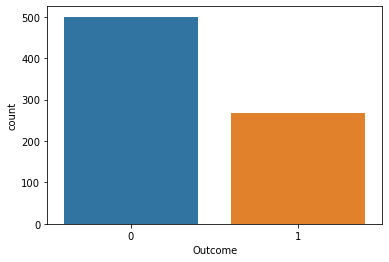

In [6]:
sns.countplot(x=df['Outcome'])

In [7]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [8]:
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train,y_train)

LogisticRegression()

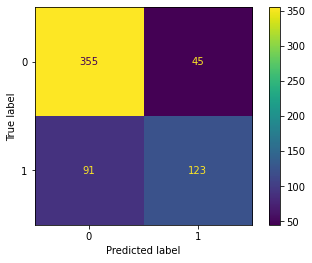

In [9]:
plot_confusion_matrix(Logistic_model,x_train,y_train)

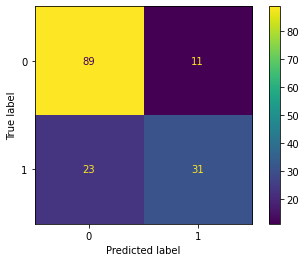

In [10]:
plot_confusion_matrix(Logistic_model,x_test,y_test)

In [15]:
y_pred=Logistic_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*50)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score: \n",accuracy)
print("*"*50)

clf_report=classification_report(y_test,y_pred)
print("Classification Report: \n",clf_report)

Confusion Matrix: 
 [[89 11]
 [23 31]]
**************************************************
Accuracy Score: 
 0.7792207792207793
**************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



In [17]:
y_pred=Logistic_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [19]:
y_pred_prob=Logistic_model.predict_proba(x_test)
y_pred_prob

array([[0.0089725 , 0.9910275 ],
       [0.72166295, 0.27833705],
       [0.21071447, 0.78928553],
       [0.33702086, 0.66297914],
       [0.88625751, 0.11374249],
       [0.51569979, 0.48430021],
       [0.93540286, 0.06459714],
       [0.03960474, 0.96039526],
       [0.25220508, 0.74779492],
       [0.20888029, 0.79111971],
       [0.95407973, 0.04592027],
       [0.47396117, 0.52603883],
       [0.63388089, 0.36611911],
       [0.71873844, 0.28126156],
       [0.78942059, 0.21057941],
       [0.204622  , 0.795378  ],
       [0.25156283, 0.74843717],
       [0.16004156, 0.83995844],
       [0.52802433, 0.47197567],
       [0.47594599, 0.52405401],
       [0.93293244, 0.06706756],
       [0.94350711, 0.05649289],
       [0.67364461, 0.32635539],
       [0.71112165, 0.28887835],
       [0.77105916, 0.22894084],
       [0.74732841, 0.25267159],
       [0.53524304, 0.46475696],
       [0.72689767, 0.27310233],
       [0.65648595, 0.34351405],
       [0.91947538, 0.08052462],
       [0.

In [20]:
y_pred_train=Logistic_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*50)

accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy Score: \n",accuracy)
print("*"*50)

clf_report=classification_report(y_train,y_pred_train)
print("Classification Report: \n",clf_report)

Confusion Matrix: 
 [[355  45]
 [ 91 123]]
**************************************************
Accuracy Score: 
 0.7785016286644951
**************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.73      0.57      0.64       214

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [26]:
y_pred_prob=Logistic_model.predict_proba(x_train)

y_pred_prob[:,1]


fpr,tpr,thresh=roc_curve(y_train,y_pred_prob[:,1])
thresh

array([1.9589736 , 0.9589736 , 0.95549457, 0.94066256, 0.93874839,
       0.88532716, 0.8841568 , 0.86230633, 0.85640221, 0.8393242 ,
       0.83052687, 0.81081357, 0.80988742, 0.80394504, 0.80273672,
       0.79006506, 0.78786984, 0.78558323, 0.78367358, 0.77665683,
       0.77546963, 0.75057072, 0.74766061, 0.73004781, 0.72859793,
       0.72789662, 0.7161662 , 0.71201947, 0.70848015, 0.70359939,
       0.69632065, 0.68657092, 0.68148592, 0.67597317, 0.67047509,
       0.6609835 , 0.65836455, 0.64997925, 0.64973621, 0.64904243,
       0.64701773, 0.64096556, 0.63385968, 0.61426839, 0.61182211,
       0.60601841, 0.60507545, 0.6044059 , 0.60410576, 0.60140748,
       0.59821551, 0.59531286, 0.59370736, 0.59331913, 0.59167096,
       0.58722943, 0.5809904 , 0.56539924, 0.56527512, 0.55505291,
       0.55117452, 0.54967136, 0.54393112, 0.53738951, 0.53492997,
       0.52991243, 0.5282144 , 0.50286889, 0.48942814, 0.4798985 ,
       0.4718267 , 0.46558361, 0.46220792, 0.45813485, 0.45432

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC) Curve')

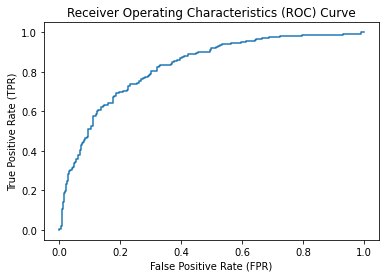

In [28]:
plt.plot(fpr,tpr)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title("Receiver Operating Characteristics (ROC) Curve")

In [29]:
x_test.iloc[3]

Glucose                     145.000
BloodPressure                80.000
SkinThickness                46.000
Insulin                     130.000
BMI                          37.900
DiabetesPedigreeFunction      0.637
Age                          40.000
Name: 663, dtype: float64

In [31]:
Glucose=155.000
BloodPressure=88.000
SkinThickness=76.000
Insulin=120.000
BMI=31.900
DiabetesPedigreeFunction=0.447
Age=32.000


test_array=np.array([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])

predict_class=Logistic_model.predict(test_array)[0]
predict_class

1

In [33]:
import pickle

In [35]:
with open("Logistic_model.pkl",'wb')as f:
    pickle.dump(Logistic_model,f)

In [36]:
list(x.columns)

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [37]:
project_data={'columns':list(x.columns)}

In [39]:
import json

with open('project_data.json', 'w') as f:
    json.dump(project_data ,f)